# LDA vs. NB (wdbc dataset)

`Naive Bayes` `Linear Discriminant Analysis`  
`Breast Cancer Wisconsin (Diagnostic)` `wdbc dataset`

---

In this notebook, we experiment with Naive Bayes and Linear Discriminant Analysis to classify the data into malignant vs. benign. The features were computed from digitized images of a fine needle aspirate (FNA) of a breast mass.  These features describe characteristics of the cell nuclei present in the image.

## Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data

In [2]:
data = pd.read_csv('data/wdbc.txt', header=None)
print(data.shape)
data.head()

(569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Looks like there are 32 columns in the dataset, ID + target variable + 30 features.

- Let's print the properties of these columns:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

- Let's encode the target variable numerically:

In [4]:
data['targets'] = data[1].map({'M': 1, 'B': 0})
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,targets
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Linear discriminant analysis

- Let's implement linear discriminant analysis from scratch:

In [5]:
n = len(data) # number of instances
targets = data['targets'].values
estimated_labels = np.zeros(n,)

# leave-one-out estimation
for i in range(n):

  # extract the data from the dataframe
  X = data.iloc[:, 2:-1].values
  y = data.iloc[:, -1].values

  # remove one instance from the data
  mask = np.ones(n, dtype=bool)
  mask[i] = False
  X = X[mask]
  y = y[mask]

  # number of instances in each class
  n1 = sum(y==1)
  n2 = sum(y==0)

  # sample mean of each class
  X1 = (np.mean(X[y==1,:], axis=0))
  X2 = (np.mean(X[y==0,:], axis=0))

  # sample covariance of each class
  S1 = np.cov(X[y==1,:].T)
  S2 = np.cov(X[y==0,:].T)
  # common cov
  S=(n1*S1+n2*S2)/(n-3)

  # aprior probabilities, the probabilities of the classes
  p1=n1/(n-1);
  p2=n2/(n-1);

  # calculate the intercept b, the bias b0, and the equation of the line L
  b = np.matmul(np.linalg.inv(S), (X1-X2)) # b=inv(S)*(X1-X2)
  b0 = -(np.matmul(X1.T,(np.matmul(np.linalg.inv(S),X1))) \
         - np.matmul(X2.T,(np.matmul(np.linalg.inv(S),X2))))/2 \
         + np.log(p1) - np.log(p2)

  L = lambda x: b0 + np.matmul(b.T, x)

  # estimate the label of the i-th sample (i.e. removed one)
  if L(data.iloc[i,2:-1].values.T) > 0:
    estimated_labels[i] = 1

- Let's evaluate the performance of our model (the real evaluation should be performed on some testing data):

Accuracy: 0.96


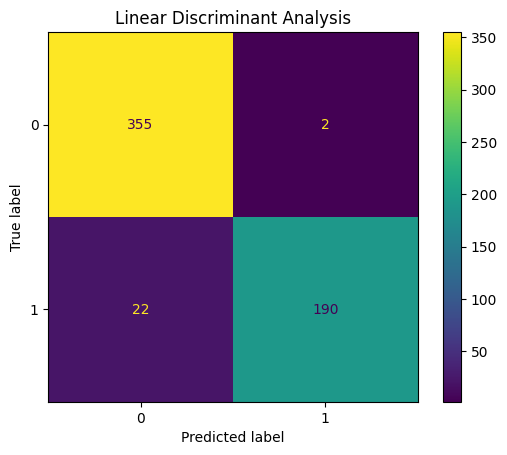

In [6]:
accuracy = np.sum(estimated_labels == targets)/len(targets)
print(f'Accuracy: {round(accuracy, 2)}')

cm = confusion_matrix(targets, estimated_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Linear Discriminant Analysis')
plt.show()

- Now, let's experiment with the built in linear discriminant analysis

In [7]:
lda = LinearDiscriminantAnalysis()

lda.fit(X, y)
lda.coef_, lda.intercept_

(array([[-4.24844235e+00,  8.15732387e-02,  4.89013557e-01,
          5.03635666e-03,  6.15348755e+00, -8.37203709e+01,
          2.68106912e+01,  3.77283393e+01,  2.55535163e+00,
          1.21613145e+01,  8.23863419e+00, -1.21685941e-01,
         -4.47589158e-01, -1.66422766e-02,  2.99357417e+02,
          4.00184683e+00, -6.72523929e+01,  2.01600007e+02,
          3.23137214e+01, -1.48423821e+02,  3.65954150e+00,
          1.36999338e-01, -4.60234948e-02, -1.88994404e-02,
          9.88153327e+00,  1.57518528e+00,  7.06317207e+00,
          9.28822842e+00,  1.02041437e+01,  8.09591674e+01]]),
 array([-49.23561336]))

Accuracy: 0.96


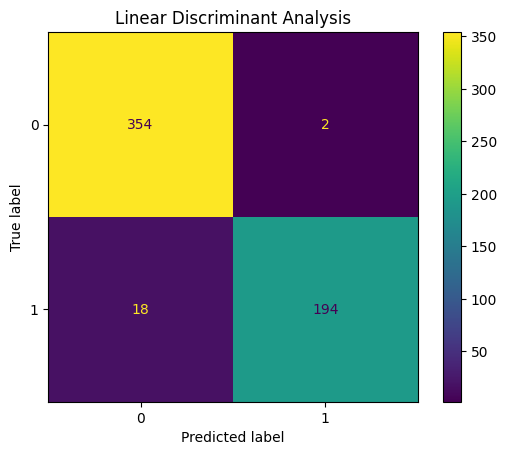

In [8]:
pred = lda.predict(X)

accuracy = np.sum(pred == y)/len(y)
print(f'Accuracy: {round(accuracy, 2)}')

cm2 = confusion_matrix(y, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
disp.ax_.set_title('Linear Discriminant Analysis')
plt.show()

- It seems like both the built-in LDA and our estimated LDA performed equally good on the data. Once again, the real evaluation should be done on some testing data (unseen data).

## Naive bayes

- Now, let's experiment with Naive Bayes classifier:

In [9]:
X = data.iloc[:, 2:-1].values
y = data.iloc[:, -1].values

gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X)

- Let's evaluate it's performance on the training data (should be done on some testing data):

Accuracy: 0.94


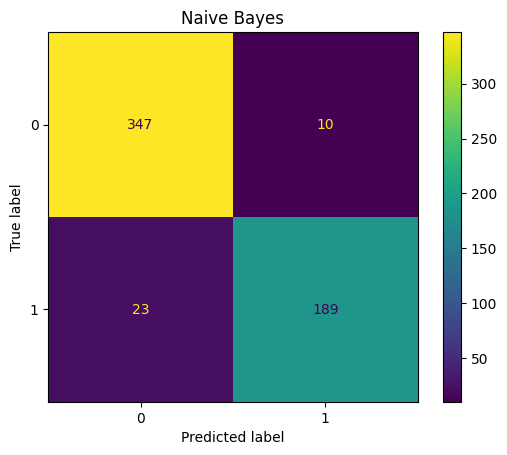

In [10]:
accuracy = np.sum(y_pred == y)/len(y)
print(f'Accuracy: {round(accuracy, 2)}')

cm3 = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
disp.ax_.set_title('Naive Bayes')
plt.show()

- It seems that the performance of the Naive Bayes model is a little worse than the performance of the LDA on the training data (should be evaluated on some testing data).